<a href="https://colab.research.google.com/github/NNRahat/PyTorch_projects/blob/main/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# device agnostic code

In [2]:
device = "cude" if torch.cuda.is_available() else "cpu"
device

'cude'

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path("Data")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} already exist...skipping download.")
else:
  print(f"{image_path} doesn't exist. creating one.....")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("downloading zip file........")
  f.write(request.content)

# unzipping the zip file 
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("unzipping the zipfile.....")
  zip_ref.extractall(image_path)



Data/pizza_steak_sushi doesn't exist. creating one.....
downloading zip file........
unzipping the zipfile.....


In [4]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(filenames)} images {len(dirnames)} directories in {dirpath}") 

In [5]:
walk_through_dir(image_path)

there are 0 images 2 directories in Data/pizza_steak_sushi
there are 0 images 3 directories in Data/pizza_steak_sushi/test
there are 31 images 0 directories in Data/pizza_steak_sushi/test/sushi
there are 19 images 0 directories in Data/pizza_steak_sushi/test/steak
there are 25 images 0 directories in Data/pizza_steak_sushi/test/pizza
there are 0 images 3 directories in Data/pizza_steak_sushi/train
there are 72 images 0 directories in Data/pizza_steak_sushi/train/sushi
there are 75 images 0 directories in Data/pizza_steak_sushi/train/steak
there are 78 images 0 directories in Data/pizza_steak_sushi/train/pizza


In [6]:
train_dir = image_path / "train"

test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('Data/pizza_steak_sushi/train'),
 PosixPath('Data/pizza_steak_sushi/test'))

image height: 512
image width: 384


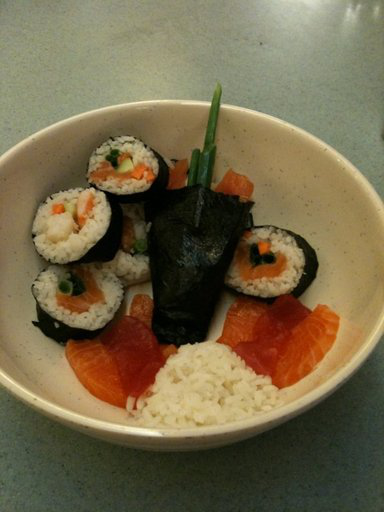

In [10]:
from PIL import Image
import random

# random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"image height: {img.height}")
print(f"image width: {img.width}")

img

### with matplotlib

Its a steak and the shape is (512, 512, 3)


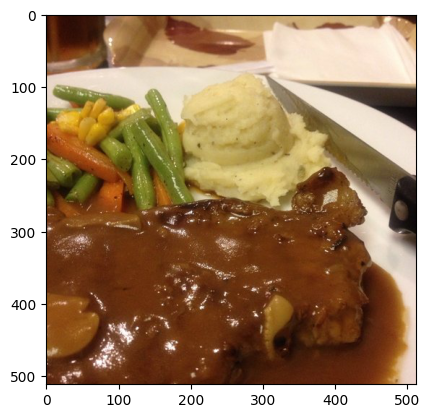

In [17]:
import numpy as np

image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image = random.choice(image_path_list)
img = Image.open(random_image)
img_as_array = np.asarray(img)
plt.imshow(img_as_array)
print(f"Its a {random_image.parent.stem} and the shape is {img_as_array.shape}")
# random_image